In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import winsound

Using TensorFlow backend.


In [2]:
df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

In [3]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역(150),승차,234.0
1,2008-01-01,150.0,서울역(150),승차,-420.0
2,2008-01-01,150.0,서울역(150),승차,-318.0
3,2008-01-01,150.0,서울역(150),승차,-161.0
4,2008-01-01,150.0,서울역(150),승차,-205.0
5,2008-01-01,150.0,서울역(150),승차,13.0
6,2008-01-01,150.0,서울역(150),승차,538.0
7,2008-01-01,150.0,서울역(150),승차,632.0
8,2008-01-01,150.0,서울역(150),승차,604.0
9,2008-01-01,150.0,서울역(150),승차,808.0


In [4]:
df.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [5]:
df['name']

0           서울역(150)
1           서울역(150)
2           서울역(150)
3           서울역(150)
4           서울역(150)
5           서울역(150)
6           서울역(150)
7           서울역(150)
8           서울역(150)
9           서울역(150)
10          서울역(150)
11          서울역(150)
12          서울역(150)
13          서울역(150)
14          서울역(150)
15          서울역(150)
16          서울역(150)
17          서울역(150)
18          서울역(150)
19          서울역(150)
20           시청(151)
21           시청(151)
22           시청(151)
23           시청(151)
24           시청(151)
25           시청(151)
26           시청(151)
27           시청(151)
28           시청(151)
29           시청(151)
              ...   
19220330          수진
19220331          수진
19220332          수진
19220333          수진
19220334          수진
19220335          수진
19220336          수진
19220337          수진
19220338          수진
19220339          수진
19220340       모란(8)
19220341       모란(8)
19220342       모란(8)
19220343       모란(8)
19220344       모란(8)
19220345       모란(8)
19220346     

In [6]:
s = df['name']
s

0           서울역(150)
1           서울역(150)
2           서울역(150)
3           서울역(150)
4           서울역(150)
5           서울역(150)
6           서울역(150)
7           서울역(150)
8           서울역(150)
9           서울역(150)
10          서울역(150)
11          서울역(150)
12          서울역(150)
13          서울역(150)
14          서울역(150)
15          서울역(150)
16          서울역(150)
17          서울역(150)
18          서울역(150)
19          서울역(150)
20           시청(151)
21           시청(151)
22           시청(151)
23           시청(151)
24           시청(151)
25           시청(151)
26           시청(151)
27           시청(151)
28           시청(151)
29           시청(151)
              ...   
19220330          수진
19220331          수진
19220332          수진
19220333          수진
19220334          수진
19220335          수진
19220336          수진
19220337          수진
19220338          수진
19220339          수진
19220340       모란(8)
19220341       모란(8)
19220342       모란(8)
19220343       모란(8)
19220344       모란(8)
19220345       모란(8)
19220346     

In [7]:
s = list(set(s))
s

['왕십리(성동구청)(208)',
 '천호(5)',
 '동대문(155)',
 '마천',
 '도봉산(7)',
 '신천(217)',
 '마곡',
 '잠실새내(217)',
 '동대문운동장(422)',
 '중화',
 '장한평',
 '효창공원앞',
 '논현',
 '약수(323)',
 '공릉',
 '독립문(316)',
 '양재(332)',
 '중계',
 '구의(213)',
 '뚝섬(210)',
 '동대입구(322)',
 '면목',
 '신당(206)',
 '혜화(420)',
 '청구(5)',
 '복정(8)',
 '미아(415)',
 '한강진',
 '개롱',
 '천호(8)',
 '일원(338)',
 '성신여대입구(418)',
 '고덕',
 '여의나루',
 '신대방삼거리',
 '버티고개',
 '단대오거리',
 '신흥',
 '무악재(315)',
 '노원(7)',
 '수진',
 '모란(8)',
 '오목교',
 '우장산',
 '아현(242)',
 '수유(414)',
 '당고개(409)',
 '응암',
 '상일동',
 '동대문역사문화공원5',
 '봉천(229)',
 '동대문역사문화공원(205)',
 '디지털미디어시티(6)',
 '노원(411)',
 '중곡',
 '굽은다리',
 '마포구청',
 '강동구청',
 '광나루',
 '방화',
 '제기동(157)',
 '매봉(333)',
 '오금',
 '암사',
 '용두(250)',
 '삼각지(428)',
 '태릉입구(6)',
 '양천구청(248)',
 '월곡',
 '남한산성입구',
 '신정네거리(249)',
 '을지로입구(202)',
 '마들',
 '뚝섬유원지',
 '서울대입구(228)',
 '가락시장(340)',
 '상도',
 '목동',
 '몽촌토성',
 '을지로3가(320)',
 '옥수(325)',
 '대청(337)',
 '청량리(지하)(158)',
 '쌍문(413)',
 '역촌',
 '송파',
 '잠원(328)',
 '방이',
 '까치울',
 '행당',
 '종로3가(319)',
 '하계',
 '철산',
 '삼산체육관',
 '삼각지(6)'

In [8]:
len(s)

284

In [9]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 20

In [10]:
s[1]

'천호(5)'

In [11]:
# for i in range(len(s)):
#     print(s[i] ,':', len(df[df['name']==s[i]]))

In [12]:
20226480 - 19220360 # 71220 * 284 - rows

1006120

In [13]:
data1 = df[df['name']==s[1]]

In [14]:
data1.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [15]:
data1

,date,number,name,div,a
3040,2008-01-01,2548.0,천호(5),승차,162.0
3041,2008-01-01,2548.0,천호(5),승차,112.0
3042,2008-01-01,2548.0,천호(5),승차,18.0
3043,2008-01-01,2548.0,천호(5),승차,-123.0
3044,2008-01-01,2548.0,천호(5),승차,-208.0
3045,2008-01-01,2548.0,천호(5),승차,13.0
3046,2008-01-01,2548.0,천호(5),승차,-49.0
3047,2008-01-01,2548.0,천호(5),승차,-157.0
3048,2008-01-01,2548.0,천호(5),승차,-193.0
3049,2008-01-01,2548.0,천호(5),승차,-327.0


In [16]:
len(data1)

71220

In [17]:
data1.shape

(71220, 5)

In [18]:
data1 = df[df['name']=='강남(222)']
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

                date  number     name div        a
620       2008-01-01   222.0  강남(222)  승차    945.0
621       2008-01-01   222.0  강남(222)  승차    314.0
622       2008-01-01   222.0  강남(222)  승차    -64.0
623       2008-01-01   222.0  강남(222)  승차   -205.0
624       2008-01-01   222.0  강남(222)  승차   -806.0
625       2008-01-01   222.0  강남(222)  승차   -405.0
626       2008-01-01   222.0  강남(222)  승차   -336.0
627       2008-01-01   222.0  강남(222)  승차   -474.0
628       2008-01-01   222.0  강남(222)  승차   -628.0
629       2008-01-01   222.0  강남(222)  승차   -584.0
630       2008-01-01   222.0  강남(222)  승차   -661.0
631       2008-01-01   222.0  강남(222)  승차   -751.0
632       2008-01-01   222.0  강남(222)  승차   -839.0
633       2008-01-01   222.0  강남(222)  승차   -723.0
634       2008-01-01   222.0  강남(222)  승차   -198.0
635       2008-01-01   222.0  강남(222)  승차    800.0
636       2008-01-01   222.0  강남(222)  승차   1650.0
637       2008-01-01   222.0  강남(222)  승차   1725.0
638       2008-01-01   222.0  강

In [19]:
data

array([[ 945.],
       [ 314.],
       [ -64.],
       ...,
       [4176.],
       [1975.],
       [-159.]], dtype=float32)

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# 모델 구성하기

In [21]:
model = Sequential()
model.add(LSTM(512, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(512, input_shape=(None, 1)))
model.add(Dropout(0.3))
# model.add(LSTM(i, input_shape=(None, 1)))

# model.add(Dense(i))
# model.add(Dropout(0.3))
# model.add(Dropout(0.3))
# model.add(Dense(64))

model.add(Dense(1))
name = "tt.jpg"
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=64)
# from keras.models import load_model
# model = load_model('trythis.h5')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 512)         1052672   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 3,152,385
Trainable params: 3,152,385
Non-trainable params: 0
___________

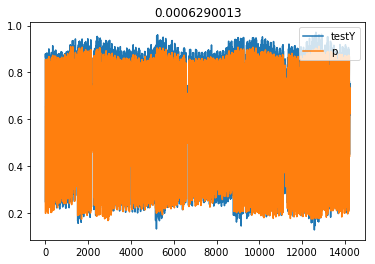

0.0006290013


In [22]:
p = model.predict(x_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

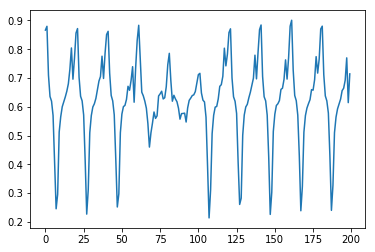

In [23]:
plt.plot(y_test[:200])

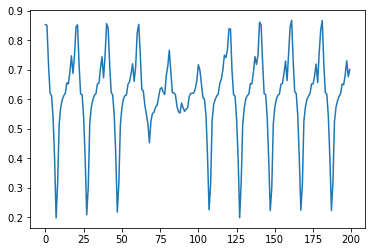

In [24]:
plt.plot(p[:200])

Text(0.5, 0, 'Time')

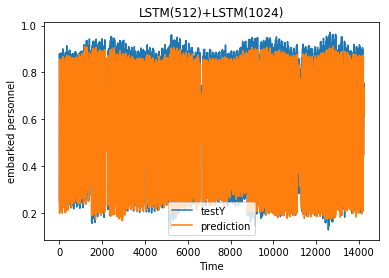

In [25]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'prediction'], loc='best')
plt.title('LSTM(512)+LSTM(1024)')
plt.ylabel('embarked personnel')
plt.xlabel('Time')


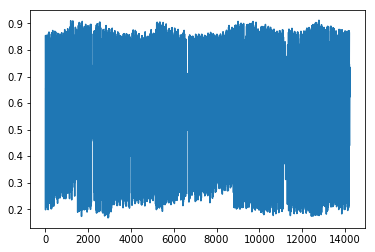

In [26]:
plt.plot(p)

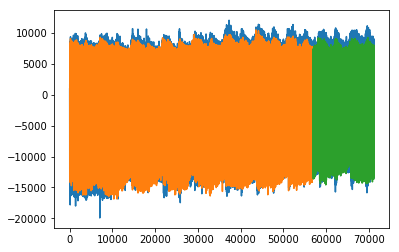

In [27]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data)+2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

(14224, 1)

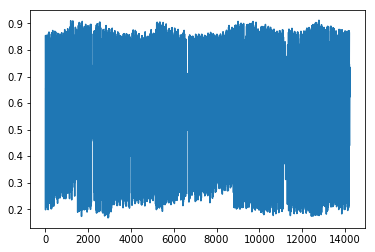

In [28]:
plt.plot(p)
p.shape

In [29]:
y = p
x = list(range(len(p)))
x = np.reshape(x, (-1, 1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=.8)
from sklearn.linear_model import LinearRegression

model = LinearRegression() 
model.fit(X_train, y_train)


D:\Anaconda3\envs\me\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

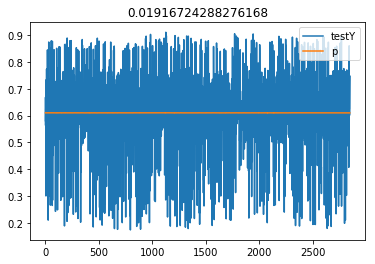

0.01916724288276168


In [30]:
p = model.predict(X_test)
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [31]:
import math
# make predictions
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# 마지막으로 모델의 기술을 시각적으로 표시하기 위해 열차 및 테스트 데이터 세트 모두에 대해 모델을 사용하여 예측을 생성 할 수 있습니다.

# 데이터 세트가 준비되었으므로, x 축에서 원래 데이터 세트와 정렬되도록 예측을 이동해야합니다. 준비가 완료되면 데이터가 그려져 원본 데이터 세트가 파란색으로 표시되고 교육 데이터 세트의 녹색 예측이 표시되며 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시됩니다.

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
plt.plot(testPredictPlot)
plt.show()

In [ ]:
from keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plot_model(loaded_model, to_file='model_plot.png')

In [ ]:
SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

In [ ]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))

In [ ]:
p